In [1]:
#define the file and that I want to read it
def read_file(filename):
    fhand = open(filename, 'r')
    return fhand.read()

In [2]:
#open the Bread Basket file with all the data
filename = "BreadBasket_DMS.csv"
read_file(filename)

"Date,Time,Transaction,Item\n10/30/2016,9:58:11,1,Bread\n10/30/2016,10:05:34,2,Scandinavian\n10/30/2016,10:05:34,2,Scandinavian\n10/30/2016,10:07:57,3,Hot chocolate\n10/30/2016,10:07:57,3,Jam\n10/30/2016,10:07:57,3,Cookies\n10/30/2016,10:08:41,4,Muffin\n10/30/2016,10:13:03,5,Coffee\n10/30/2016,10:13:03,5,Pastry\n10/30/2016,10:13:03,5,Bread\n10/30/2016,10:16:55,6,Medialuna\n10/30/2016,10:16:55,6,Pastry\n10/30/2016,10:16:55,6,Muffin\n10/30/2016,10:19:12,7,Medialuna\n10/30/2016,10:19:12,7,Pastry\n10/30/2016,10:19:12,7,Coffee\n10/30/2016,10:19:12,7,Tea\n10/30/2016,10:20:51,8,Pastry\n10/30/2016,10:20:51,8,Bread\n10/30/2016,10:21:59,9,Bread\n10/30/2016,10:21:59,9,Muffin\n10/30/2016,10:25:58,10,Scandinavian\n10/30/2016,10:25:58,10,Medialuna\n10/30/2016,10:27:21,11,Bread\n10/30/2016,10:27:21,11,Medialuna\n10/30/2016,10:27:21,11,Bread\n10/30/2016,10:27:21,11,NONE\n10/30/2016,10:30:14,12,Jam\n10/30/2016,10:30:14,12,Coffee\n10/30/2016,10:30:14,12,Tartine\n10/30/2016,10:30:14,12,Pastry\n10/30/2016

In [3]:
#import pandas to be able to clearly read the data and use the pandas library + its functions
import pandas as pd

fpath = "BreadBasket_DMS.csv"
restaurant_data = pd.read_csv(fpath) 
restaurant_data 

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam
...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee
21289,4/9/2017,14:32:58,9682,Tea
21290,4/9/2017,14:57:06,9683,Coffee
21291,4/9/2017,14:57:06,9683,Pastry


In [5]:
#here I am just testing how many values and columns are in my dataframe
df = pd.DataFrame(restaurant_data)
df.shape

(21293, 4)

In [6]:
#using value_counts function to cocunt how many time each item comes up in the data set (it gives us top 5 items)
df['Item'].value_counts()
#these are general top items, but we need to use this again when we have the associated time stamp bc we need top 5 per stamp

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
The BART             1
Adjustment           1
Olum & polenta       1
Bacon                1
Name: Item, Length: 95, dtype: int64

In [7]:
#need to clean data first

#first, i replaced the NONE items with the phrase unknown items. this was because I did not want to delete the NONE entries because they showed up in my top 5 items for certain time periods
df2=df.replace('NONE','Unknown Item')

#here, I will make a new column called "Hour" that will display the hour in each time stamp, which will help me create my time periods. it helps that the time is in military time, so it did not get too complicated
def extract_hour(time):
    return int(time.split(":")[0])

df2["Hour"] = df2["Time"].apply(extract_hour)
df2.sort_values(by="Hour")

,Date,Time,Transaction,Item,Hour
8561,1/1/2017,1:21:05,4090,Bread,1
903,11/4/2016,7:32:33,437,Medialuna,7
711,11/3/2016,7:50:50,341,Medialuna,7
4688,11/28/2016,7:44:17,2217,Coffee,7
4689,11/28/2016,7:44:17,2217,Bread,7
...,...,...,...,...,...
21215,4/8/2017,22:43:06,9640,Vegan Feast,22
21218,4/8/2017,22:48:52,9643,Vegan Feast,22
14123,2/14/2017,23:29:03,6588,Valentine's card,23
14124,2/14/2017,23:38:41,6589,Valentine's card,23


In [8]:
#this will be to define the time periods so that I can associate the item transactions with certain time periods
def time_period(hour):
    if hour < 9:
        return "Morning Rush"
    elif hour >= 9 and hour < 12:
        return "Morning"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 18:
        return "Afternoon"
    elif hour >= 18 and hour < 20:
        return "Dinner Rush"
    elif hour >= 20:
        return "Night"
#using .apply as the start of my split apply combine code
df2["time_period"] = df2["Hour"].apply(time_period)
df2

,Date,Time,Transaction,Item,Hour,time_period
0,10/30/2016,9:58:11,1,Bread,9,Morning
1,10/30/2016,10:05:34,2,Scandinavian,10,Morning
2,10/30/2016,10:05:34,2,Scandinavian,10,Morning
3,10/30/2016,10:07:57,3,Hot chocolate,10,Morning
4,10/30/2016,10:07:57,3,Jam,10,Morning
...,...,...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee,14,Afternoon
21289,4/9/2017,14:32:58,9682,Tea,14,Afternoon
21290,4/9/2017,14:57:06,9683,Coffee,14,Afternoon
21291,4/9/2017,14:57:06,9683,Pastry,14,Afternoon


In [9]:
#now that i have a new column for time periods, I am going to use value counts and try somthing cool with that
df2['time_period'].value_counts() #I used this to make sure that there were no duplicates and my count of time periods added to the correct count of rows
df2[['time_period', 'Item']].value_counts() 

time_period  Item                      
Morning      Coffee                        2349
Afternoon    Coffee                        1545
Morning      Bread                         1436
Lunch Rush   Coffee                        1347
Afternoon    Bread                          893
                                           ... 
             Polenta                          1
Morning      Empanadas                        1
             Drinking chocolate spoons        1
Afternoon    Raw bars                         1
Night        Vegan mincepie                   1
Length: 321, dtype: int64

In [10]:
#i want top 5 items for EACH time period. here is where I do that

#here i group my df by time period and item and count the occurrences of each item within each time period
grouped = df2.groupby(["time_period", "Item"]).size().reset_index(name="count")

#here i sort the df by time period and the item count
sorted_grouped = grouped.sort_values(["time_period", "count"], ascending=[True, False])

#this finds me the top 5 items for each time period (my goal!)
top_five_items = sorted_grouped.groupby("time_period").head(5)

top_five_items

,time_period,Item,count
18,Afternoon,Coffee,1545
8,Afternoon,Bread,893
70,Afternoon,Tea,607
11,Afternoon,Cake,510
61,Afternoon,Sandwich,279
85,Dinner Rush,Coffee,17
107,Dinner Rush,Tshirt,16
81,Dinner Rush,Afternoon with the baker,14
83,Dinner Rush,Bread,8
105,Dinner Rush,Tea,8


In [11]:
#here is my checking/cross referencing to make sure that all of my top 5 items are correct/match up
for time_period, group in top_five_items.groupby("time_period"):
    print(f"Time Period: {time_period}")
    print(group)
    print("------------")

Time Period: Afternoon
   time_period      Item  count
18   Afternoon    Coffee   1545
8    Afternoon     Bread    893
70   Afternoon       Tea    607
11   Afternoon      Cake    510
61   Afternoon  Sandwich    279
------------
Time Period: Dinner Rush
     time_period                      Item  count
85   Dinner Rush                    Coffee     17
107  Dinner Rush                    Tshirt     16
81   Dinner Rush  Afternoon with the baker     14
83   Dinner Rush                     Bread      8
105  Dinner Rush                       Tea      8
------------
Time Period: Lunch Rush
    time_period          Item  count
130  Lunch Rush        Coffee   1347
120  Lunch Rush         Bread    814
169  Lunch Rush      Sandwich    396
178  Lunch Rush           Tea    364
183  Lunch Rush  Unknown Item    326
------------
Time Period: Morning
    time_period       Item  count
204     Morning     Coffee   2349
195     Morning      Bread   1436
241     Morning     Pastry    545
252     Morning   

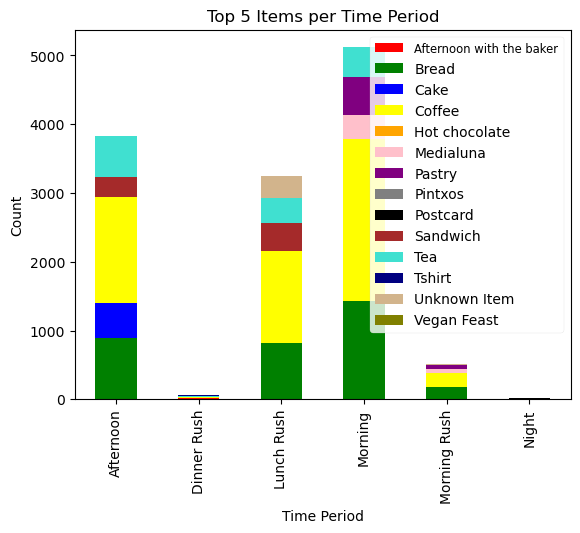

In [12]:
#matplotlib plot for extra credit
import matplotlib.pyplot as plt

#here I set the contents of my chart
pivot_df = top_five_items.pivot(index='time_period', columns='Item', values='count')

#here I set the colors so that none of them repeat
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'purple', 'grey', 'black', 'brown', 'turquoise', 'navy', 'tan', 'olive']

#here i set plot type, colors, and indicate that I am making a stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, color=colors)

#set labels and axies
ax.set_xlabel('Time Period')
ax.set_ylabel('Count')
ax.set_title('Top 5 Items per Time Period')

#I made a key and set it to be small because it was originally in the way 
legend = plt.legend()
legend.get_frame().set_linewidth(0.2)
legend.get_texts()[0].set_fontsize('small')

plt.show()

In [13]:
#for transferring into csv and txt files!

#csv for top five items
top_five_items.to_csv("top5.csv")

#txt for report in a text file
report = top_five_items.groupby('time_period')['Item'].apply(', '.join)

with open('summarized_report.txt', 'w') as file:
    for time_period, items in report.items():
        file.write(f'Time Period: {time_period}\n')
        file.write(f'Top 5 Items: {items}\n')
        file.write('\n')